In [1]:
from madigan.environments import make_env
from madigan.utils.preprocessor import StackerDiscrete
from madigan.utils.config import make_config
from madigan.environments.cpp import HDFSourceSingle
from madigan.utils.data import State

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
config_hdf = make_config("HDF",
                        data_source_type="HDFSourceSingle",
                        data_source_config=dict(filepath="/media/hemu/Data/Markets/Crypto/CME/brti_rolled.hdf5",
                                                group_key="min",
                                                price_key="price",
                                                feature_key="features",
                                                timestamp_key="timestamps",
                                                cache_size=1000000,
                                                )
                        )
env_hdf = make_env(config_hdf)

## Manual Test

In [3]:
filepath="/media/hemu/Data/Markets/Crypto/CME/brti_rolled.hdf5"
group_key="min"
price_key="price"
feature_key="features"
timestamp_key="timestamps"
cache_size=1000000
datasource = HDFSourceSingle(filepath, group_key, price_key, feature_key,
                             timestamp_key, cache_size)
datasource.getData()

array([ 7.08015275e+00,  7.08214547e+00,  7.08214547e+00,  7.08214547e+00,
        7.08214547e+00,  7.08214547e+00,  7.08214547e+00,  7.08214547e+00,
        7.08221266e+00,  7.08221266e+00,  7.08221266e+00,  7.08221266e+00,
        7.08221266e+00,  7.08221266e+00,  7.08221266e+00,  7.08011909e+00,
        7.08011909e+00,  7.08011909e+00,  7.08011909e+00,  7.08011909e+00,
        7.08011909e+00,  7.08011909e+00,  7.08129365e+00,  7.08129365e+00,
        7.08129365e+00,  7.08129365e+00,  7.08129365e+00,  7.08129365e+00,
        7.08129365e+00, -1.99271087e-03, -1.99271087e-03, -1.99271087e-03,
       -1.99271087e-03, -1.99271087e-03, -1.99271087e-03, -1.99271087e-03,
        6.99311313e-04,  6.99311313e-04,  6.99311313e-04,  6.99311313e-04,
        6.99311313e-04,  6.99311313e-04,  6.99311313e-04,  1.10870772e-03,
        1.10870772e-03,  1.10870772e-03,  1.10870772e-03,  1.10870772e-03,
        1.10870772e-03,  1.10870772e-03])

In [4]:
for i in range(108000):
    datasource.getData()
datasource.getData(), datasource.currentPrices(), datasource.currentTime


(array([ 7.91044387e+00,  7.91053925e+00,  7.91559275e+00,  7.92049009e+00,
         7.92229369e+00,  7.88465181e+00,  7.86054765e+00,  7.90352979e+00,
         7.91063830e+00,  7.91913435e+00,  7.92116909e+00,  7.92372844e+00,
         7.92735683e+00,  7.92735683e+00,  7.94249727e+00,  7.91005856e+00,
         7.91005856e+00,  7.90763320e+00,  7.90763320e+00,  7.87827280e+00,
         7.85773607e+00,  7.64639194e+00,  7.91042595e+00,  7.91292552e+00,
         7.91307961e+00,  7.91670320e+00,  7.90903955e+00,  7.88360601e+00,
         7.84092362e+00, -9.53872908e-05, -5.14888783e-03, -1.00462267e-02,
        -1.18498238e-02,  2.57920574e-02,  4.98962203e-02,  6.91407322e-03,
         1.70209282e-04,  2.12736068e-03,  3.24393316e-03,  4.62890765e-03,
         1.33479669e-02,  2.00109542e-02,  4.53838005e-02,  6.01270529e-04,
         3.24918820e-03,  8.38218711e-03,  2.41891618e-02,  3.78945263e-02,
         3.97550711e-02,  1.10174155e-01]),
 array([2725.6]),
 1498002900000000000)

In [5]:
print(datasource.nfeats, datasource.size, datasource.boundsIdx)
print(datasource.currentCacheSize)
print(datasource.currentIdx, datasource.currentCacheIdx)

50 1539088 (0, 1539088)
1000000
108002 108002


In [6]:
env_hdf.step()
env_hdf.step(np.array([1200]))

(<madigan.environments.cpp.build.env.State at 0x7f694a8eea30>,
 0.0,
 False,
 <madigan.environments.cpp.build.env.EnvInfoMulti at 0x7f694a8eebf0>)

## SubClass

In [8]:
# window_hdf.reset_state()
# class EnvHDF:
#     def __init__(self, dsource):
#         self.dsource = dsource
#     def step(self):
#         return State(self.dsource.getData(), 1, self.dsource.currentTime), 0., 1, 1
# env_hdf = EnvHDF(datasource)

# Viz

In [ ]:
window_hdf = StackerDiscrete(12800, env_hdf.nAssets, norm=False)
window_hdf.initialize_history(env_hdf)

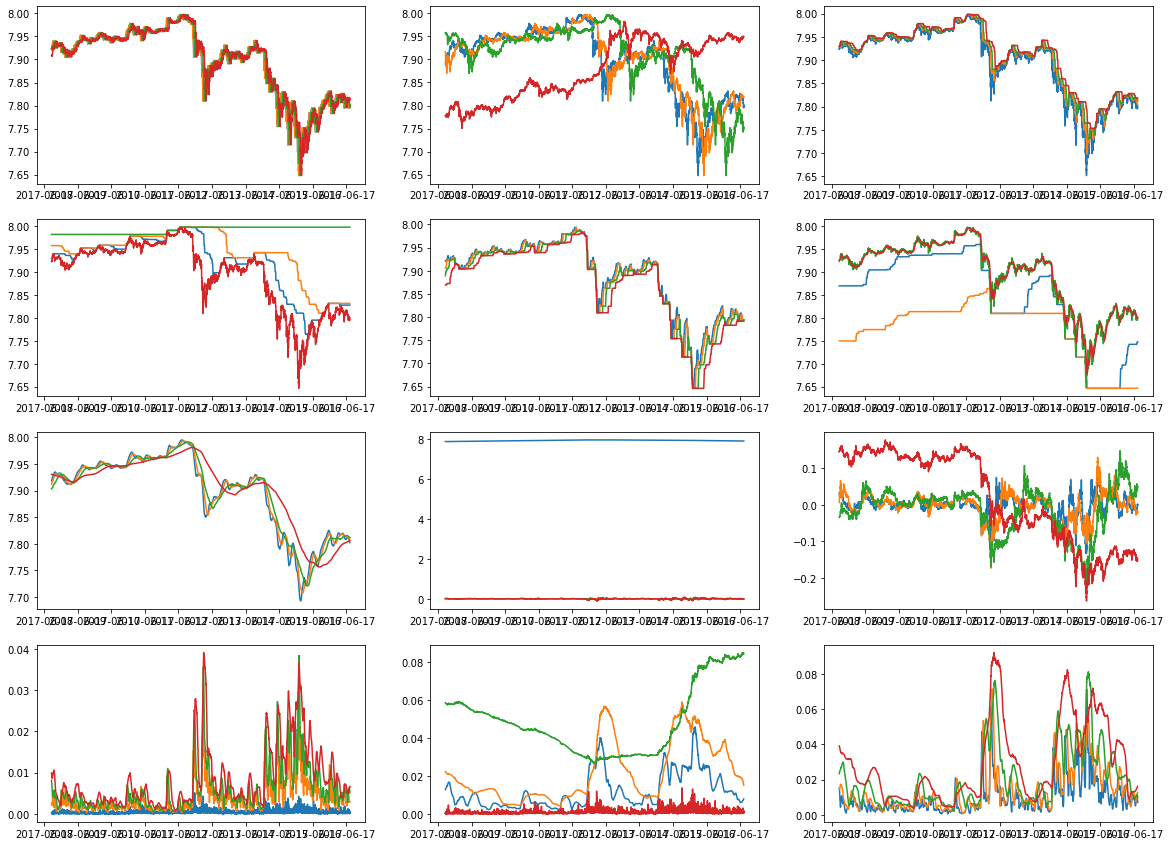

In [15]:
# window_trend_ou.reset_state()
# window_trend_ou.initialize_history(env_trend_ou)
for i in range(12800):
    window_hdf.stream(env_hdf.step())
    
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
# ax[0].plot(window_trend_ou.current_data().price, label='trend_ou')
# ax[0].legend()
_ax = ax.flatten()
for i in range(len(_ax)):
    _ax[i].plot(pd.to_datetime(window_hdf.current_data().timestamp), 
                window_hdf.current_data().price[:, i*4: (i+1)*4])
    # ax.plot(pd.to_datetime(window_hdf.current_data().timestamp), env_hdf.current_data().price[:, :4]) 
#     _ax.legend()

In [13]:
window_hdf.current_data()

State(price=array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]]), portfolio=array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]]), timestamp=array([3842, 3843, 3844, ..., 5119, 5120, 5121]))